In [2]:
# Import needed packages
# You may add or remove packages should you need them
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score

# Set random seed
np.random.seed(0)

# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()

In [3]:
# Load the Iris dataset included with scikit-learn
iris = load_iris()

In [7]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
df_iris["target"] = iris.target
df_iris["class"] = iris.target_names[iris.target]
df_iris.columns = [col.replace("(cm)", "").strip() for col in df_iris.columns]

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = df_iris.iloc[:, 0:4]
scaler = StandardScaler()
# transform data
X_scaled = scaler.fit_transform(X)


In [9]:
pca = PCA()

In [13]:
pd.DataFrame(pca.fit_transform(X))

,0,1,2,3
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,-0.426196
146,1.527167,-0.375317,-0.121898,-0.254367
147,1.764346,0.078859,0.130482,-0.137001
148,1.900942,0.116628,0.723252,-0.044595


In [39]:
# Put data in a pandas DataFrame
newdf = pd.DataFrame(pca.fit_transform(X))

In [59]:
# Add target and class to DataFrame
newdf["target"] = iris.target
newdf["class"] = iris.target_names[iris.target]

In [20]:
# Show 10 random samples
newdf.sample(10)

,0,1,2,3,target,class
114,1.585928,-0.539641,0.629029,-0.329552,2,virginica
62,0.264977,-0.550036,-0.694147,-0.057186,1,versicolor
33,-2.598737,1.093146,0.157811,0.095349,0,setosa
107,2.932587,0.355500,-0.420240,0.257191,2,virginica
7,-2.626145,0.163385,-0.021879,0.045298,0,setosa
100,2.531193,-0.009849,0.760165,0.029056,2,virginica
40,-2.770102,0.263528,0.077248,-0.094063,0,setosa
86,1.220691,0.407620,-0.237167,-0.031217,1,versicolor
76,1.332024,0.244441,-0.521703,-0.035333,1,versicolor
71,0.357888,-0.068925,-0.229854,-0.122998,1,versicolor


# PCA Exercise
Taking in consideration the iris dataset, answer the following questions. **You may have to run some code first :)**
1. How many **principal components can we consider**?
2. How do you think is going to be the **cumulated percentage of explained variance** attending to the number of components? Calculate it.
3. Consider the necessary number of components to explain at least a **99% of the variance**. Give the equations to calculate these components.
4. Calculate the **new values** for this decomposition and plot them.
5. Repeat the steps 3 and 4 **taking a 95% of the variance**

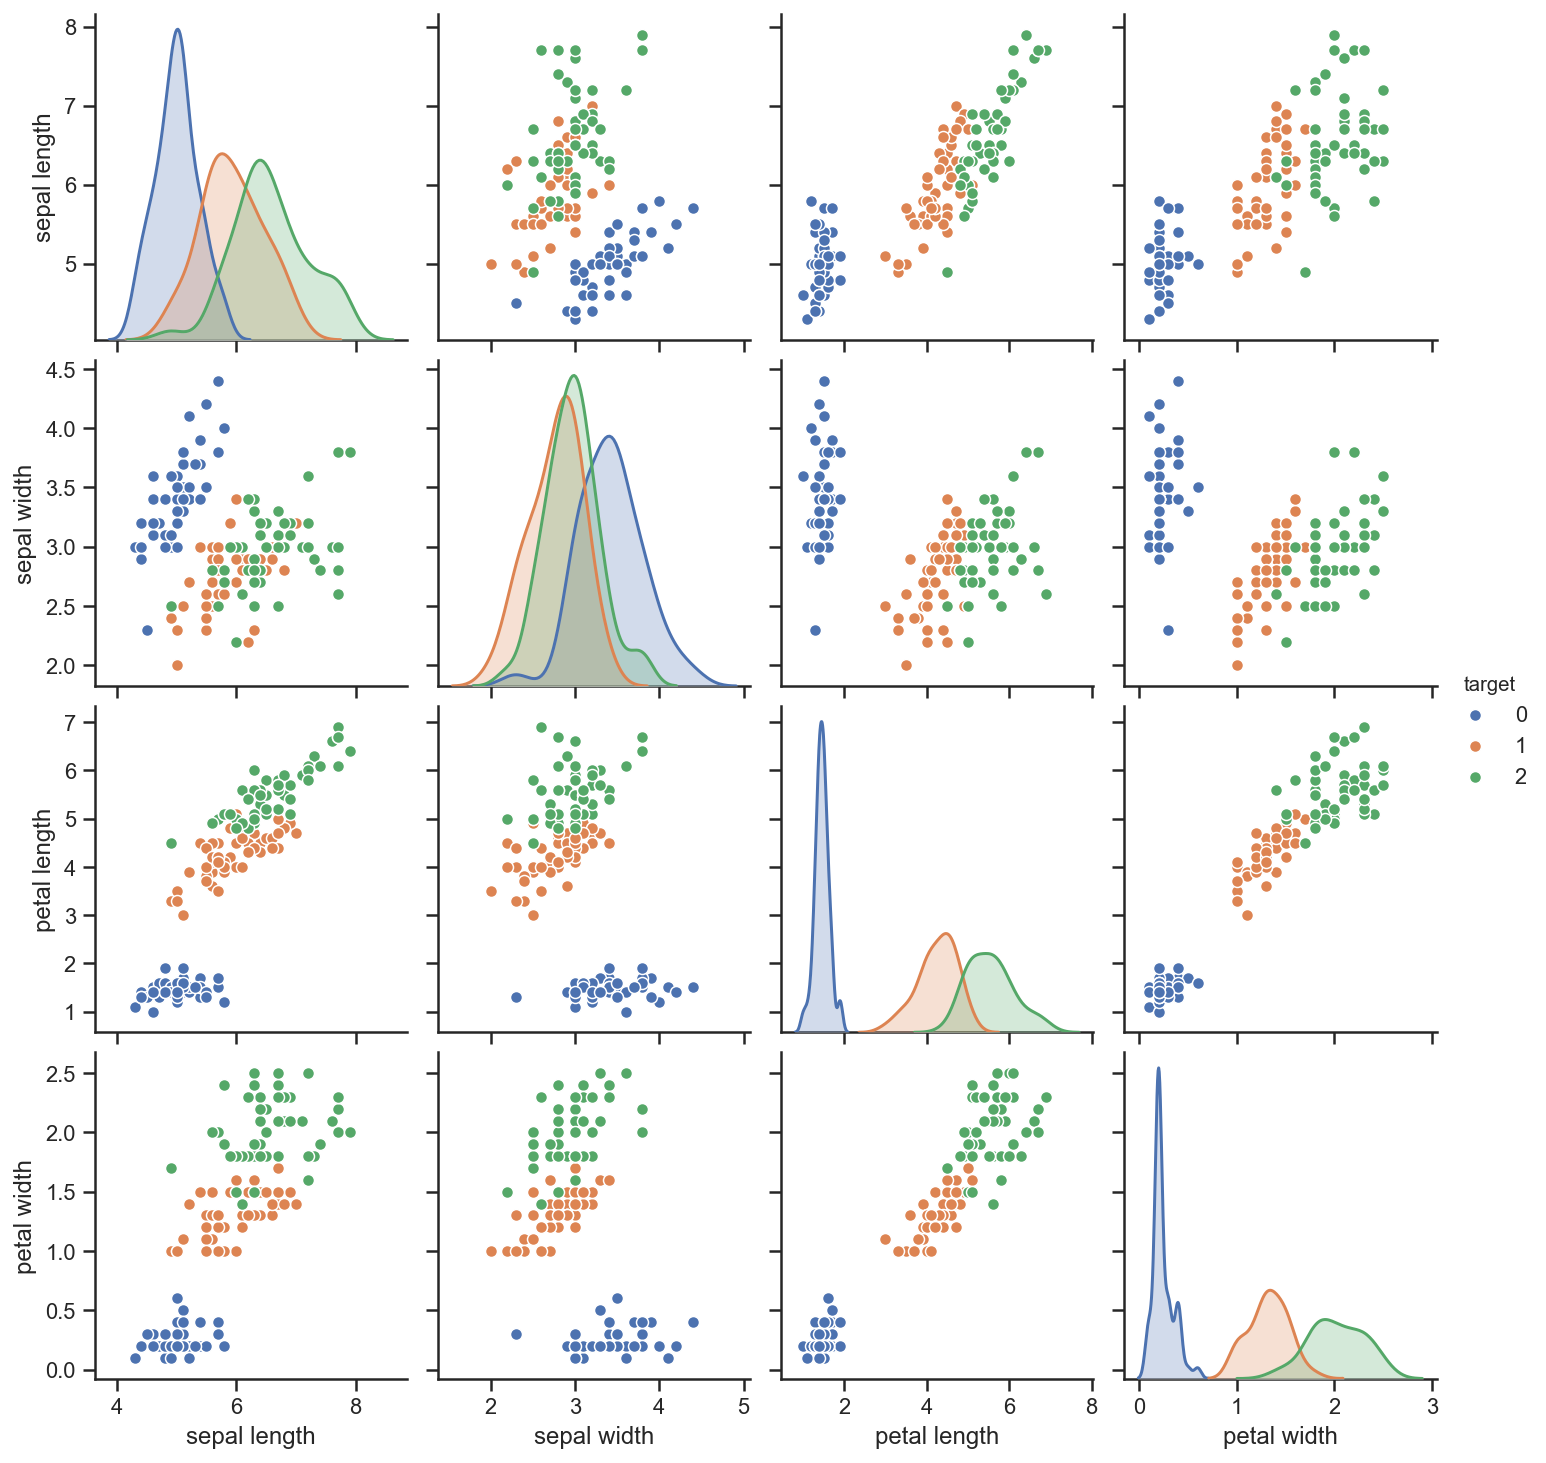

In [12]:
# A graph to help you out
#sns.set(style="ticks")
#sns.pairplot(data = df_iris.loc[:,:"target"], hue = 'target')

In [34]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())
print(pca.explained_variance_ratio_[:3].sum())


[0.92461872 0.05306648 0.01710261 0.00521218]
[0.92461872 0.97768521 0.99478782 1.        ]
0.9947878161267246
Help on PCA in module sklearn.decomposition._pca object:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`T

In [ ]:
# Run the PCA model here


In [20]:
# You should end up with a transformed dataframe
print(df.var())

,0,1,2,3
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259


In [14]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
# check the variance in each component

[0.92461872 0.05306648 0.01710261 0.00521218]


In [38]:
# compare it with the original dataframe and to what it corresponds (more or less)
print(df_iris.var())#this should more or less correspond to how much the values influence each column in our new dataframe

sepal length    0.685694
sepal width     0.189979
petal length    3.116278
petal width     0.581006
target          0.671141
dtype: float64


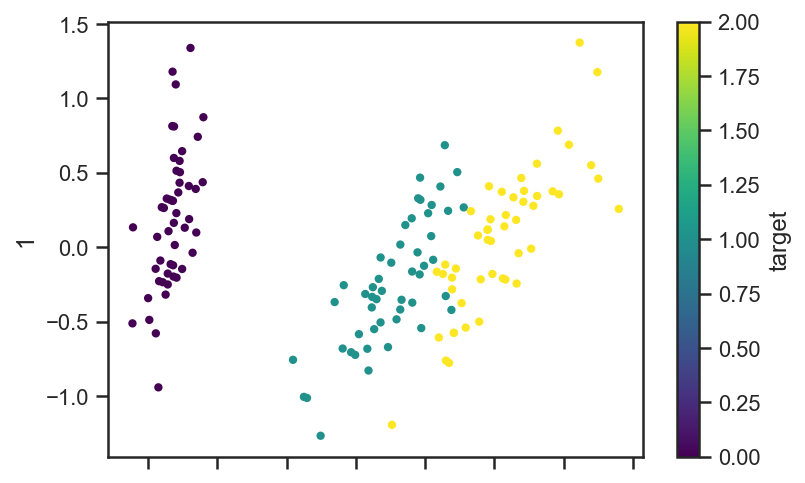

In [61]:

# plot it!
newdf.plot.scatter(x = 0, y = 1, c = 'target', cmap='viridis', s=10)
#newdf